Saving free-nature-images.jpg to free-nature-images (8).jpg
Uploaded image: /content/free-nature-images (8).jpg


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet50_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/deeplabv3_resnet50_coco-cd0a2569.pth" to /root/.cache/torch/hub/checkpoints/deeplabv3_resnet50_coco-cd0a2569.pth


100%|██████████| 161M/161M [00:00<00:00, 253MB/s]


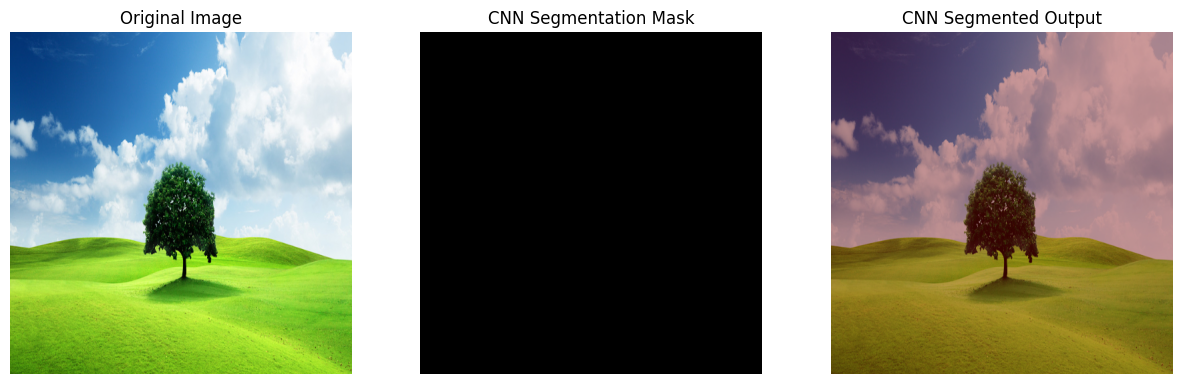

In [9]:
# ================== STEP 1: Upload Image ==================
from google.colab import files
uploaded = files.upload()

import os
image_name = list(uploaded.keys())[0]
image_path = os.path.join("/content", image_name)

print("Uploaded image:", image_path)

# ================== STEP 2: Install & Import ==================
!pip install -q torch torchvision

import torch
import torchvision.transforms as T
from torchvision import models
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ================== STEP 3: Load Image ==================
image_bgr = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Resize for display
image_rgb = cv2.resize(image_rgb, (512, 512))

# ================== STEP 4: Preprocess for CNN ==================
transform = T.Compose([
    T.ToPILImage(),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225])
])

input_tensor = transform(image_rgb).unsqueeze(0)

# ================== STEP 5: Load CNN Segmentation Model ==================
model = models.segmentation.deeplabv3_resnet50(pretrained=True)
model.eval()

# ================== STEP 6: CNN Segmentation ==================
with torch.no_grad():
    output = model(input_tensor)["out"]

segmentation_mask = torch.argmax(output.squeeze(), dim=0).cpu().numpy()

# Create colored mask
colored_mask = cv2.applyColorMap(
    (segmentation_mask * 5).astype(np.uint8),
    cv2.COLORMAP_JET
)

# Overlay
overlay = cv2.addWeighted(image_rgb, 0.6, colored_mask, 0.4, 0)

# ================== STEP 7: SIDE-BY-SIDE DISPLAY ==================
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(segmentation_mask, cmap="gray")
plt.title("CNN Segmentation Mask")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(overlay)
plt.title("CNN Segmented Output")
plt.axis("off")

plt.show()
